In [1]:
import matplotlib.pyplot as plt

from config import *
from train import dataPreprocessing, LSTMModel

In [2]:
tic = 'ARL'
# Load the full original dataset to retrieve dates
original_data = pd.read_csv('train_data_0_20.csv', low_memory=False)

ARL = pd.read_csv('results/result_ARL.csv')
ARL


,Unnamed: 0,date,tic,anomaly
0,0,2015/11/12,ARL,0.856715
1,1,2015/11/13,ARL,0.837086
2,2,2015/11/16,ARL,0.799628
3,3,2015/11/17,ARL,0.843560
4,4,2015/11/18,ARL,0.827744
...,...,...,...,...
2191,2191,2024/9/12,ARL,0.407988
2192,2192,2024/9/13,ARL,0.495792
2193,2193,2024/9/16,ARL,0.517528
2194,2194,2024/9/17,ARL,0.464070


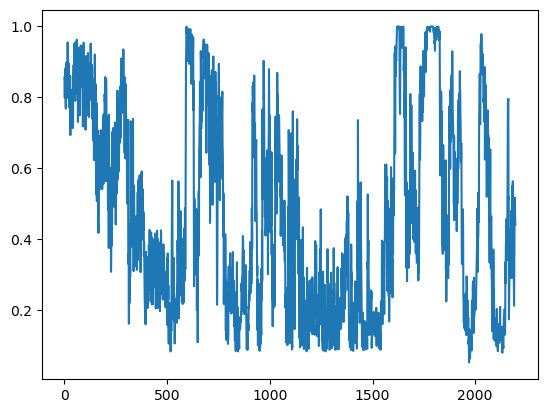

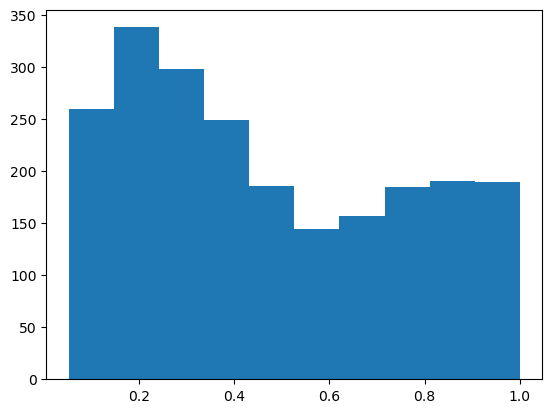

In [4]:
plt.plot(ARL['anomaly'])
plt.show()
plt.hist(ARL['anomaly'])
plt.show()

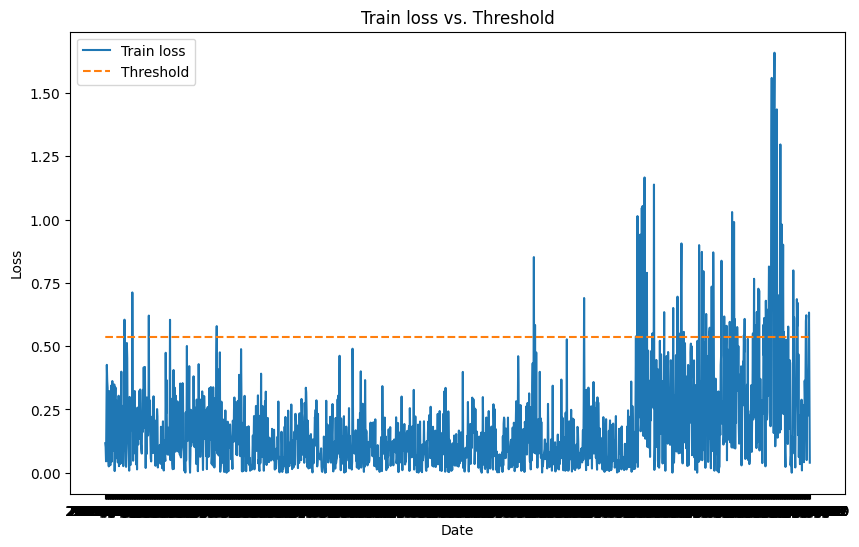

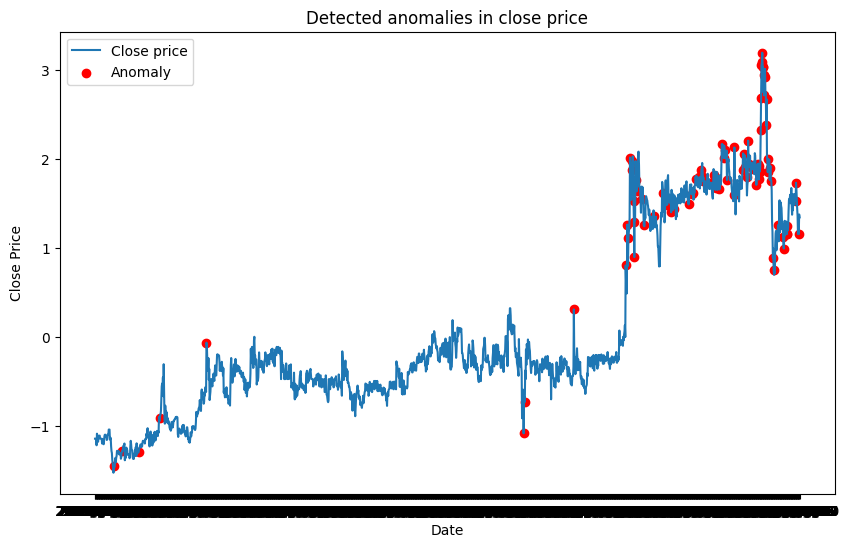

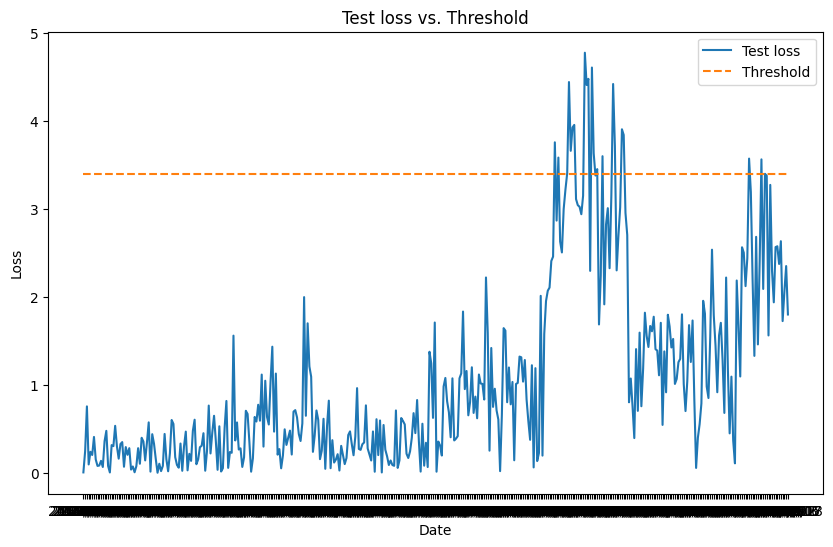

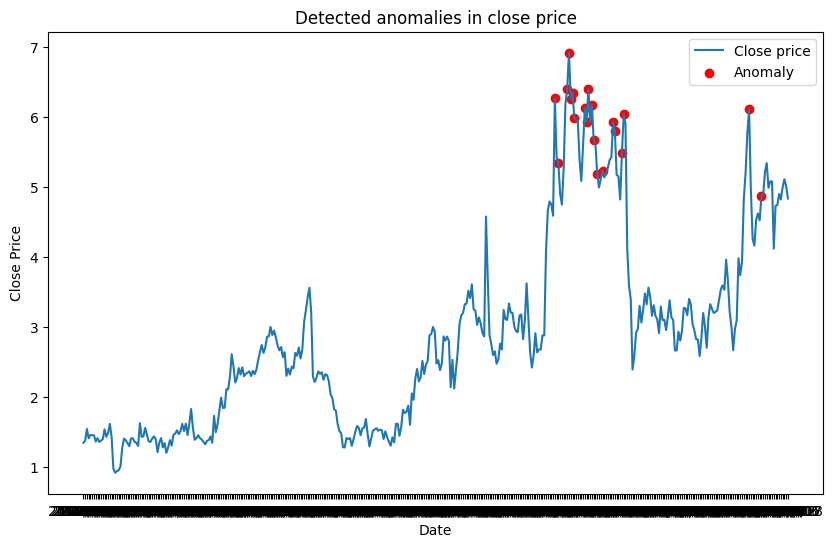

In [55]:
# Train data predictions and anomaly detection
with torch.no_grad():
    X_train_pred = model(X_train_tensor)
    train_mae_loss = torch.mean(torch.abs(X_train_pred - y_train_tensor), dim=1).numpy()

train_threshold = np.percentile(train_mae_loss, 95)
train_score_df = pd.DataFrame(train[sequence_length:]).reset_index(drop=True)
train_score_df['loss'] = train_mae_loss
train_score_df['threshold'] = train_threshold
train_score_df['anomaly'] = train_score_df['loss'] > train_score_df['threshold']

# Inverse transform the close prices back to their original scale
train_score_df['close'] = scaler_target.inverse_transform(train[sequence_length:]['close'].values.reshape(-1, 1))

# Plot train MAE loss and threshold
plt.figure(figsize=(10, 6))
plt.plot(train_score_df['date'], train_score_df['loss'], label='Train loss')
plt.plot(train_score_df['date'], train_score_df['threshold'], label='Threshold', linestyle='--')
plt.title('Train loss vs. Threshold')
plt.xlabel('Date')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Visualize anomalies on the actual close price
plt.figure(figsize=(10, 6))
plt.plot(train_score_df['date'], train_score_df['close'], label='Close price')
plt.scatter(train_score_df.loc[train_score_df['anomaly'], 'date'],
            train_score_df.loc[train_score_df['anomaly'], 'close'],
            color='red', label='Anomaly', marker='o')
plt.title('Detected anomalies in close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# Test data predictions and anomaly detection
with torch.no_grad():
    X_test_pred = model(X_test_tensor)
    test_mae_loss = torch.mean(torch.abs(X_test_pred - y_test_tensor), dim=1).numpy()

test_threshold = np.percentile(test_mae_loss, 95)
test_score_df = pd.DataFrame(test[sequence_length:]).reset_index(drop=True)
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = test_threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']

# Inverse transform the close prices back to their original scale
test_score_df['close'] = scaler_target.inverse_transform(test[sequence_length:]['close'].values.reshape(-1, 1))

# Plot test MAE loss and threshold
plt.figure(figsize=(10, 6))
plt.plot(test_score_df['date'], test_score_df['loss'], label='Test loss')
plt.plot(test_score_df['date'], test_score_df['threshold'], label='Threshold', linestyle='--')
plt.title('Test loss vs. Threshold')
plt.xlabel('Date')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize anomalies on the actual close price
plt.figure(figsize=(10, 6))
plt.plot(test_score_df['date'], test_score_df['close'], label='Close price')
plt.scatter(test_score_df.loc[test_score_df['anomaly'], 'date'], 
            test_score_df.loc[test_score_df['anomaly'], 'close'], 
            color='red', label='Anomaly', marker='o')
plt.title('Detected anomalies in close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

           date       close anomaly
0     2015/10/1  241.353332   False
1     2015/10/2  244.139999   False
2     2015/10/5  248.433334   False
3     2015/10/6  243.433334   False
4     2015/10/7  246.500000   False
...         ...         ...     ...
2251  2024/9/12  166.979996     NaN
2252  2024/9/13  171.449997     NaN
2253  2024/9/16  170.000000     NaN
2254  2024/9/17  175.250000     NaN
2255  2024/9/18  174.259995     NaN

[2256 rows x 3 columns]


TypeError: tuple indices must be integers or slices, not str

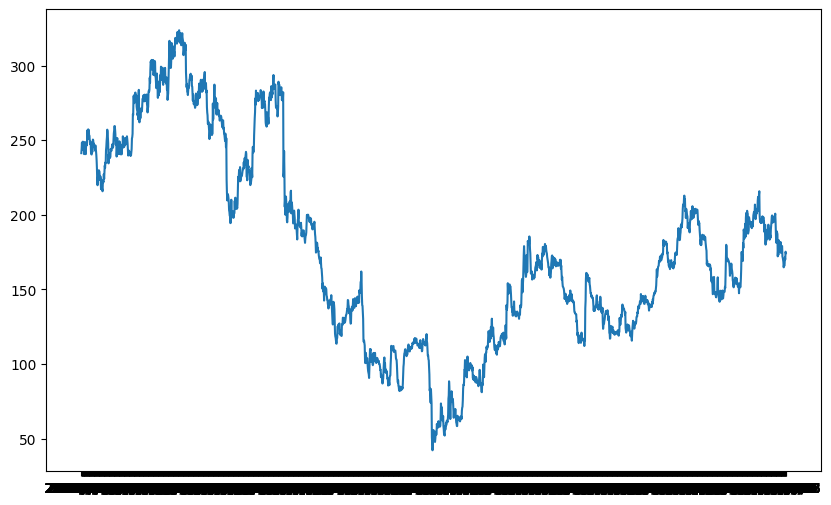

In [62]:
result = pd.read_csv('results/result_BH.csv')

data_BH = original_data.loc[original_data['tic'] == 'BH'].reset_index(drop=True)[['date', 'close']]
data_BH['anomaly'] = result['anomaly']
print(data_BH)
plt.figure(figsize=(10, 6))
plt.plot(data_BH['date'], data_BH['close'], label='Close price')
plt.scatter(data_BH.loc[data['anomaly'], 'date'], 
            data_BH.loc[data['anomaly'], 'close'], 
            color='red', label='Anomaly', marker='o')
plt.title('Detected anomalies in close price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()